<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.282635,34.404524,40.708722,76.907929,-0.000637,251.303173,251.303520,-0.000347
1,0.0,1.0,85.039082,78.948414,29.319619,73.339021,0.000061,276.646197,276.646494,-0.000298
2,0.0,2.0,20.859141,84.204251,97.317214,58.506244,0.000187,270.887037,270.887623,-0.000587
3,0.0,3.0,97.985191,57.331431,99.884775,67.811416,0.000425,333.013238,333.012530,0.000708
4,0.0,4.0,74.377945,80.119163,99.900437,69.926883,0.000094,334.324521,334.324744,-0.000223
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,89.068707,50.817830,43.737644,45.725580,0.000349,239.350111,239.350072,0.000039
19996,999.0,16.0,53.777096,68.957263,35.113719,50.692903,0.000183,218.541164,218.541379,-0.000215
19997,999.0,17.0,21.219789,93.551298,97.386732,86.688911,0.000235,308.846964,308.846558,0.000406
19998,999.0,18.0,91.569330,29.770357,38.775104,78.734815,0.002184,248.851790,248.850050,0.001740


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.282635  34.404524  40.708722  76.907929 -0.000637  251.303173   
      1.0    85.039082  78.948414  29.319619  73.339021  0.000061  276.646197   
      2.0    20.859141  84.204251  97.317214  58.506244  0.000187  270.887037   
      3.0    97.985191  57.331431  99.884775  67.811416  0.000425  333.013238   
      4.0    74.377945  80.119163  99.900437  69.926883  0.000094  334.324521   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   89.068707  50.817830  43.737644  45.725580  0.000349  239.350111   
      16.0   53.777096  68.957263  35.113719  50.692903  0.000183  218.541164   
      17.0   21.219789  93.551298  97.386732  86.688911  0.000235  308.846964   
      18.0   91.569330  29.770357  38.775104  78.734815  0.002184  248.851790   
      19.0   42.926693  36.523063  34.645234  28.691522 -0.000086  152.786426   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.303520 -0.000347  
      1.0    276.646494 -0.000298  
      2.0    270.887623 -0.000587  
      3.0    333.012530  0.000708  
      4.0    334.324744 -0.000223  
...                 ...       ...  
999.0 15.0   239.350072  0.000039  
      16.0   218.541379 -0.000215  
      17.0   308.846558  0.000406  
      18.0   248.850050  0.001740  
      19.0   152.787027 -0.000601  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.282635  34.404524  40.708722  76.907929 -0.000637  251.303173   
      1.0    85.039082  78.948414  29.319619  73.339021  0.000061  276.646197   
      2.0    20.859141  84.204251  97.317214  58.506244  0.000187  270.887037   
      3.0    97.985191  57.331431  99.884775  67.811416  0.000425  333.013238   
      4.0    74.377945  80.119163  99.900437  69.926883  0.000094  334.324521   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   89.068707  50.817830  43.737644  45.725580  0.000349  239.350111   
      16.0   53.777096  68.957263  35.113719  50.692903  0.000183  218.541164   
      17.0   21.219789  93.551298  97.386732  86.688911  0.000235  308.846964   
      18.0   91.569330  29.770357  38.775104  78.734815  0.002184  248.851790   
      19.0   42.926693  36.523063  34.645234  28.691522 -0.000086  152.786426   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.303520 -0.000347  
      1.0    276.646494 -0.000298  
      2.0    270.887623 -0.000587  
      3.0    333.012530  0.000708  
      4.0    334.324744 -0.000223  
...                 ...       ...  
999.0 15.0   239.350072  0.000039  
      16.0   218.541379 -0.000215  
      17.0   308.846558  0.000406  
      18.0   248.850050  0.001740  
      19.0   152.787027 -0.000601  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.282635,34.404524,40.708722,76.907929,-0.000637,251.303173,251.303520,-0.000347
1,0.0,1.0,85.039082,78.948414,29.319619,73.339021,0.000061,276.646197,276.646494,-0.000298
2,0.0,2.0,20.859141,84.204251,97.317214,58.506244,0.000187,270.887037,270.887623,-0.000587
3,0.0,3.0,97.985191,57.331431,99.884775,67.811416,0.000425,333.013238,333.012530,0.000708
4,0.0,4.0,74.377945,80.119163,99.900437,69.926883,0.000094,334.324521,334.324744,-0.000223
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,89.068707,50.817830,43.737644,45.725580,0.000349,239.350111,239.350072,0.000039
19996,999.0,16.0,53.777096,68.957263,35.113719,50.692903,0.000183,218.541164,218.541379,-0.000215
19997,999.0,17.0,21.219789,93.551298,97.386732,86.688911,0.000235,308.846964,308.846558,0.000406
19998,999.0,18.0,91.569330,29.770357,38.775104,78.734815,0.002184,248.851790,248.850050,0.001740


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.282635  34.404524  40.708722  76.907929 -0.000637  251.303173   
      1.0    85.039082  78.948414  29.319619  73.339021  0.000061  276.646197   
      2.0    20.859141  84.204251  97.317214  58.506244  0.000187  270.887037   
      3.0    97.985191  57.331431  99.884775  67.811416  0.000425  333.013238   
      4.0    74.377945  80.119163  99.900437  69.926883  0.000094  334.324521   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   89.068707  50.817830  43.737644  45.725580  0.000349  239.350111   
      16.0   53.777096  68.957263  35.113719  50.692903  0.000183  218.541164   
      17.0   21.219789  93.551298  97.386732  86.688911  0.000235  308.846964   
      18.0   91.569330  29.770357  38.775104  78.734815  0.002184  248.851790   
      19.0   42.926693  36.523063  34.645234  28.691522 -0.000086  152.786426   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.303520 -0.000347  
      1.0    276.646494 -0.000298  
      2.0    270.887623 -0.000587  
      3.0    333.012530  0.000708  
      4.0    334.324744 -0.000223  
...                 ...       ...  
999.0 15.0   239.350072  0.000039  
      16.0   218.541379 -0.000215  
      17.0   308.846558  0.000406  
      18.0   248.850050  0.001740  
      19.0   152.787027 -0.000601  

[20000 rows x 8 columns]

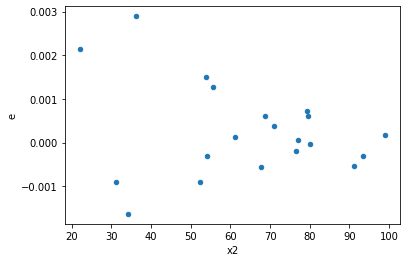

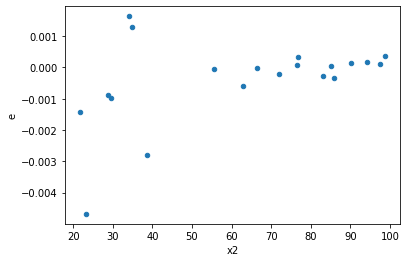

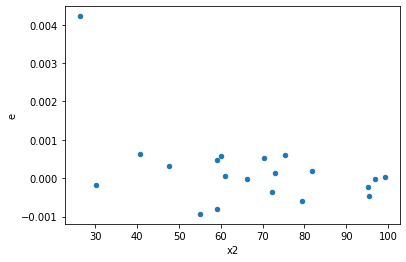

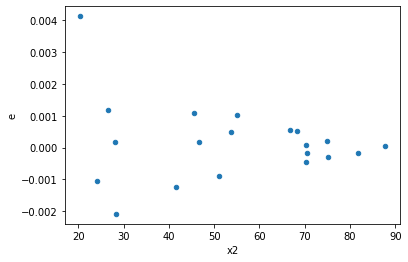

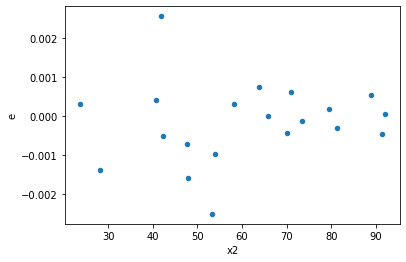

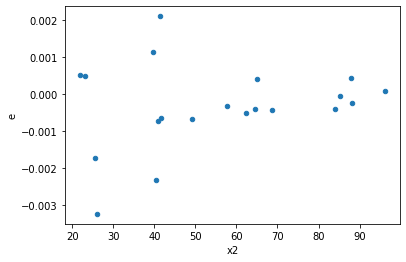

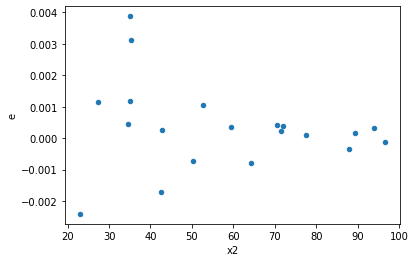

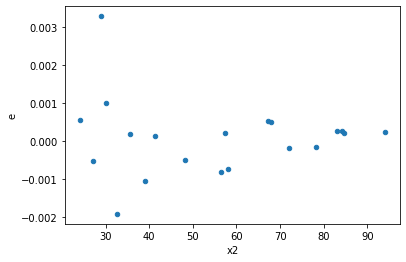

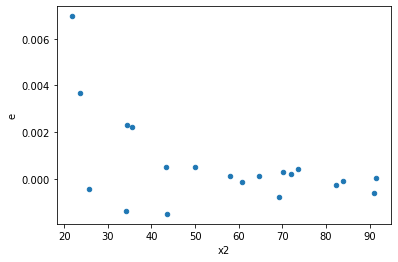

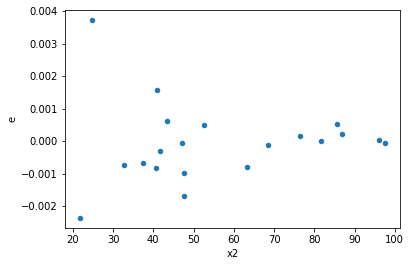

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,7.0,1.3437648846256652e-06,2.928837486540632e-06,2.6875297692513305e-07,4.1840535522009027e-07,1.5568398906950383,0.5729305470228034,0.7135347264885983,0.2864652735114017,Reject005=1 : Homoscedasticity
4.0,9.0,3.0,3.0165272712211033e-06,2.6441283612522317e-06,3.351696968023448e-07,8.813761204174106e-07,2.6296414288824352,0.460607393046949,0.7696963034765255,0.2303036965234745,Reject005=1 : Homoscedasticity
5.0,1.0,11.0,1.9111410285798164e-21,1.7865397694418947e-05,1.9111410285798164e-21,1.6241270631289951e-06,849820624873454.0,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,2.0,10.0,2.189133297942047e-08,1.534194565982902e-06,1.0945666489710234e-08,1.534194565982902e-07,14.016456352156924,0.0025132290017135794,0.9987433854991432,0.0012566145008567897,Reject005=0 : Heteroscedasticity
7.0,7.0,5.0,1.417546101816697e-05,1.2120614698624068e-05,2.0250658597381386e-06,2.4241229397248134e-06,1.1970588156763835,0.8726885495298604,0.5636557252350698,0.4363442747649302,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,1.7207346133110527e-07,1.4349252341677558e-05,2.867891022185088e-08,2.39154205694626e-06,83.39026965969262,3.2688974713979135e-05,0.999983655512643,1.6344487356989568e-05,Reject005=0 : Heteroscedasticity
18.0,6.0,6.0,5.677098027814358e-07,2.2770192625121925e-05,9.461830046357263e-08,3.7950321041869877e-06,40.108859338982185,0.0002774857137322062,0.9998612571431339,0.0001387428568661031,Reject005=0 : Heteroscedasticity
19.0,2.0,10.0,4.154568517282274e-07,6.798841131984122e-06,2.077284258641137e-07,6.798841131984122e-07,3.272946927558007,0.16127937287772087,0.9193603135611396,0.08063968643886044,Reject005=1 : Homoscedasticity
20.0,4.0,8.0,5.408132680182782e-06,2.0275692478931454e-05,1.3520331700456955e-06,2.5344615598664317e-06,1.8745557550047185,0.41678012026819067,0.7916099398659047,0.20839006013409533,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,7.0,1.3437648846256652e-06,2.928837486540632e-06,2.6875297692513305e-07,4.1840535522009027e-07,1.5568398906950383,0.5729305470228034,Reject005=1 : Homoscedasticity
1.0,9.0,3.0,2.859547413175599e-06,6.222623007474879e-07,3.1772749035284436e-07,2.0742076691582932e-07,0.6528260009402502,0.5443163052350175,Reject005=1 : Homoscedasticity
2.0,4.0,8.0,1.1213665070687457e-05,1.644006494896888e-05,2.8034162676718644e-06,2.05500811862111e-06,0.7330370956032584,0.8111242205597448,Reject005=1 : Homoscedasticity
3.0,10.0,2.0,1.3708470538795327e-05,5.609125685051031e-07,1.3708470538795327e-06,2.8045628425255153e-07,0.2045861231994138,0.06612351698964375,Reject005=1 : Homoscedasticity
4.0,9.0,3.0,3.0165272712211033e-06,2.6441283612522317e-06,3.351696968023448e-07,8.813761204174106e-07,2.6296414288824352,0.460607393046949,Reject005=1 : Homoscedasticity
5.0,1.0,11.0,1.9111410285798164e-21,1.7865397694418947e-05,1.9111410285798164e-21,1.6241270631289951e-06,849820624873454.0,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,2.0,10.0,2.189133297942047e-08,1.534194565982902e-06,1.0945666489710234e-08,1.534194565982902e-07,14.016456352156924,0.0025132290017135794,Reject005=0 : Heteroscedasticity
7.0,7.0,5.0,1.417546101816697e-05,1.2120614698624068e-05,2.0250658597381386e-06,2.4241229397248134e-06,1.1970588156763835,0.8726885495298604,Reject005=1 : Homoscedasticity
8.0,4.0,8.0,1.2600544671164185e-05,2.8065202816683568e-06,3.1501361677910463e-06,3.508150352085446e-07,0.11136503837373633,0.0500010140084705,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    519
Reject005=1 : Homoscedasticity      481
Name: Result_test, dtype: int64